In [2]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Cell 2: Initialize the original data
data = {
    "Volume": [1, 2, 3, 4, 5, 6],
    "Pressure_500K": [4157, 2078, 1386, 1039, 831, 693],
    "Pressure_300K": [2492, 1247, 831, 623, 499, 416],
}
df = pd.DataFrame(data)

In [4]:
# Cell 3: Perform interpolation
volumes_interpolated = np.arange(1, 6.2, 0.2)  # volumes from 1 to 6 with a step of 0.2
pressures_500K_interpolated = np.interp(
    volumes_interpolated, df["Volume"], df["Pressure_500K"]
)
pressures_300K_interpolated = np.interp(
    volumes_interpolated, df["Volume"], df["Pressure_300K"]
)

interpolated_data = {
    "Volume": volumes_interpolated,
    "Pressure_500K": pressures_500K_interpolated,
    "Pressure_300K": pressures_300K_interpolated,
}
df_interpolated = pd.DataFrame(interpolated_data)

# display the DataFrame
df_interpolated

,Volume,Pressure_500K,Pressure_300K
0,1.0,4157.0,2492.0
1,1.2,3741.2,2243.0
2,1.4,3325.4,1994.0
3,1.6,2909.6,1745.0
4,1.8,2493.8,1496.0
5,2.0,2078.0,1247.0
6,2.2,1939.6,1163.8
7,2.4,1801.2,1080.6
8,2.6,1662.8,997.4
9,2.8,1524.4,914.2


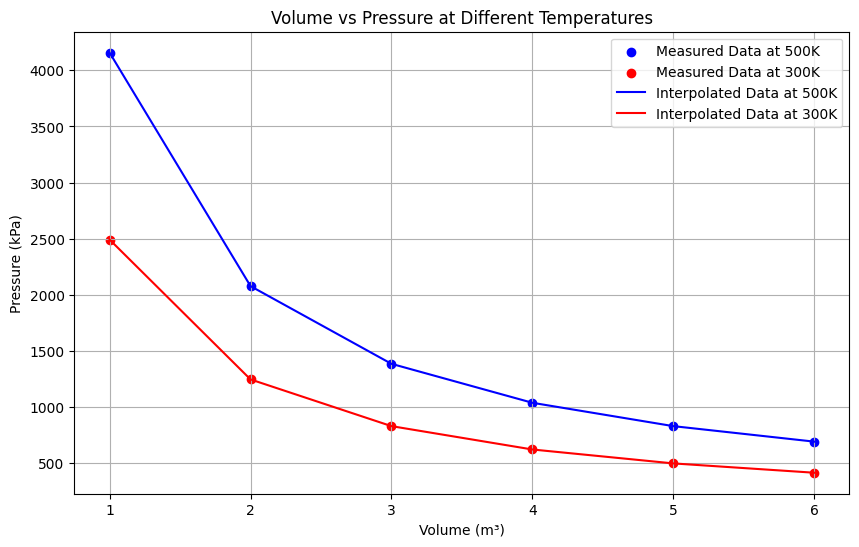

In [5]:
# Cell 4: Plot the data
plt.figure(figsize=(10, 6))

# original data
plt.scatter(
    df["Volume"], df["Pressure_500K"], color="blue", label="Measured Data at 500K"
)
plt.scatter(
    df["Volume"], df["Pressure_300K"], color="red", label="Measured Data at 300K"
)

# interpolated data
plt.plot(
    df_interpolated["Volume"],
    df_interpolated["Pressure_500K"],
    color="blue",
    label="Interpolated Data at 500K",
)
plt.plot(
    df_interpolated["Volume"],
    df_interpolated["Pressure_300K"],
    color="red",
    label="Interpolated Data at 300K",
)

plt.title("Volume vs Pressure at Different Temperatures")
plt.xlabel("Volume (m³)")
plt.ylabel("Pressure (kPa)")
plt.legend()
plt.grid(True)
plt.show()

Task B

In [6]:
# Original data
data = {
    "Volume": [1, 2, 3, 4, 5, 6],
    "Pressure_500K": [4157, 2078, 1386, 1039, 831, 693],
    "Pressure_300K": [2492, 1247, 831, 623, 499, 416],
}

# Extracting data arrays
volumes = data["Volume"]
pressures_500K = data["Pressure_500K"]
pressures_300K = data["Pressure_300K"]

# Polynomial fitting
coefficients_500K_linear = np.polyfit(volumes, pressures_500K, 1)  # First-degree
coefficients_300K_linear = np.polyfit(volumes, pressures_300K, 1)

coefficients_500K_cubic = np.polyfit(volumes, pressures_500K, 3)  # Third-degree
coefficients_300K_cubic = np.polyfit(volumes, pressures_300K, 3)

# Print the coefficients
print("Coefficients for 500K data (linear):", coefficients_500K_linear)
print("Coefficients for 300K data (linear):", coefficients_300K_linear)
print("\nCoefficients for 500K data (cubic):", coefficients_500K_cubic)
print("Coefficients for 300K data (cubic):", coefficients_300K_cubic)

# Constructing the polynomial equations
print("\nConstructed Equations:")

# For 500K data
print("\nFor 500K data:")
print(
    "Linear: P = {:.2f}V + {:.2f}".format(
        coefficients_500K_linear[0], coefficients_500K_linear[1]
    )
)
print(
    "Cubic: P = {:.2f}V^3 + {:.2f}V^2 + {:.2f}V + {:.2f}".format(
        coefficients_500K_cubic[0],
        coefficients_500K_cubic[1],
        coefficients_500K_cubic[2],
        coefficients_500K_cubic[3],
    )
)

# For 300K data
print("\nFor 300K data:")
print(
    "Linear: P = {:.2f}V + {:.2f}".format(
        coefficients_300K_linear[0], coefficients_300K_linear[1]
    )
)
print(
    "Cubic: P = {:.2f}V^3 + {:.2f}V^2 + {:.2f}V + {:.2f}".format(
        coefficients_300K_cubic[0],
        coefficients_300K_cubic[1],
        coefficients_300K_cubic[2],
        coefficients_300K_cubic[3],
    )
)

Coefficients for 500K data (linear): [-611.65714286 3838.13333333]
Coefficients for 300K data (linear): [-366.62857143 2301.2       ]

Coefficients for 500K data (cubic): [  -66.69444444   908.16666667 -4180.99603175  7459.        ]
Coefficients for 300K data (cubic): [  -39.92592593   543.82936508 -2504.53042328  4470.33333333]

Constructed Equations:

For 500K data:
Linear: P = -611.66V + 3838.13
Cubic: P = -66.69V^3 + 908.17V^2 + -4181.00V + 7459.00

For 300K data:
Linear: P = -366.63V + 2301.20
Cubic: P = -39.93V^3 + 543.83V^2 + -2504.53V + 4470.33
